In [1]:
import math

In [2]:
def entropy(p):
    result = 0
    for i in p:
        result += -i * math.log2(i)
    return result

In [3]:
hy = entropy([0.3,0.7])
hy

0.8812908992306927

In [4]:
#加入以房产为划分生成的条件熵H(Y|X1) 和信息增益 gain(X1) = H(Y) - H(Y|X1)
#y_x11是房产为是的情况下的y的信息熵:sum(-pi.log2(pi))
#y_x12是房产为否的情况下的y的信息熵
#gain = hy - hy_X1
 
hy_x11 = 0
hy_x12 = 1
hy_X1 = 0.4 * hy_x11 + 0.6 * hy_x12  #0.4=4/10：有房产的占比，
gain_X1 = hy - hy_X1
gain_X1

0.2812908992306927

In [5]:
#假如以婚姻为划分生成的条件熵H(Y|X2) 和 信息增益 gain(X2)=H(Y) - H(Y|X2)
#y_x21是 婚姻为单身的情况下 y的信息熵
#x22 已婚 x23是离婚
hy_x21 = 1
hy_x22 = 0
hy_x23 = entropy([1/3,2/3])
hy_X2 = 0.4 * hy_x21 + 0.3 * hy_x22 + 0.3 * hy_x23
gainX2 = hy - hy_X2
gainX2

0.2058021490143458

In [15]:
hy_x31 = entropy([2/5,3/5])
hy_x32 = 0
hy_X3 = 0.5 * hy_x31 + 0.5 * hy_x32 
gainX3 = hy - hy_X3
gainX3

0.3958156020033584

In [ ]:
#第二阶段划分
hy1 = entropy([2/5,3/5])
#根据房产进行划分
hy1_x11 = 0
hy1_x12 = entropy([1/4,3/4])
hy1_X1 = 1/5 * hy1_x11 + 4/5 * hy1_x12
gain2_X1 = hy1 - hy1_X1
gain2_X1

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [8]:
df = pd.read_csv('data/decisiontree.csv',sep=':',names=["ID","房产","婚姻","年收入","无法偿还"],header=None,engine='python')


df

,ID,房产,婚姻,年收入,无法偿还
0,1,是,单身,125,否
1,2,否,已婚,100,否
2,3,否,单身,100,否
3,4,是,已婚,110,否
4,5,是,离婚,60,否
5,6,否,离婚,95,是
6,7,否,单身,85,是
7,8,否,已婚,75,否
8,9,否,单身,90,是
9,10,是,离婚,220,否


In [9]:
x = df.iloc[:,1:4]
y = df['无法偿还']
x['房产'] = pd.Categorical(x['房产']).codes
x['婚姻'] = pd.Categorical(x['婚姻']).codes
x

,房产,婚姻,年收入
0,1,0,125
1,0,1,100
2,0,0,100
3,1,1,110
4,1,2,60
5,0,2,95
6,0,0,85
7,0,1,75
8,0,0,90
9,1,2,220


In [10]:
tree_gini = DecisionTreeClassifier(criterion='gini',max_depth=6)
tree_gini.fit(x,y)
tree_gini.score(x,y)

1.0

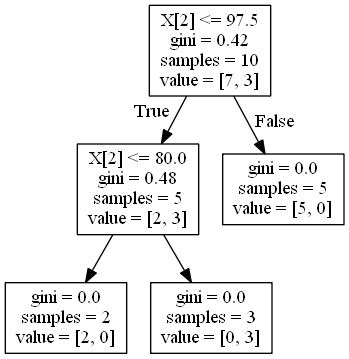

In [11]:
# #画一颗决策树
import sklearn
from sklearn.externals.six import StringIO  
import pydotplus
dot_data = StringIO() 
sklearn.tree.export_graphviz(tree_gini, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("./iris.pdf")
from IPython.display import Image 
Image(graph.create_png())  

In [12]:
tree_en = DecisionTreeClassifier(criterion='entropy',max_depth=3)
tree_en.fit(x,y)
tree_en.score(x,y)

1.0

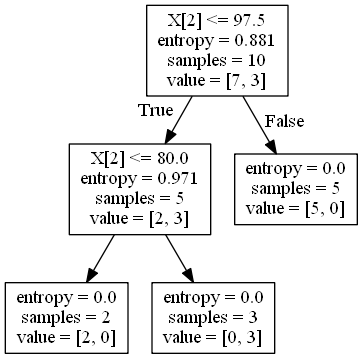

In [13]:
import sklearn
from sklearn.externals.six import StringIO  
import pydotplus
dot_data = StringIO() 
sklearn.tree.export_graphviz(tree_en, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("./iris.pdf")
from IPython.display import Image 
Image(graph.create_png())

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=False,max_depth=1,n_estimators=30)
rf.fit(x,y)
rf.score(x,y)

0.90000000000000002